# PCAとK-meansによるクラスタリングの実装
* データはirisデータセットを使用

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.datasets
%matplotlib inline

In [2]:
data = sklearn.datasets.load_iris()

x = data.data
y = data.target
col_name = data.feature_names

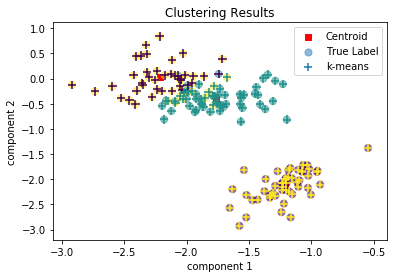

In [3]:
def pca(x, n=1):
    x = x - np.mean(x, axis=0)
    w, v = np.linalg.eig(x.T.dot(x))
    return w[:n], v[:n, :]

def kmeans(x, num_cluster=3):
    centroid = x[np.random.randint(0, x.shape[0]+1, 3)]
    cents = []
    cents.append(centroid)
#     for i in range(1000):
    while True:
        cluster = np.argmin(np.linalg.norm((x[:, :, None] - centroid.T[None]), ord=2, axis=1), axis=1)
        new_centroid = np.array([np.mean(x[cluster==i], axis=0) for i in range(num_cluster)])
        if np.all(centroid - new_centroid < 1e-30): # judge convergence
            break
        else:
            centroid = new_centroid
            cents.append(centroid)
    return centroid, cluster, np.array(cents)

# PCA
w_pca, v_pca = pca(x, 2) # Eigen values and Eigen vectors
T = v_pca.T # embedding matrix
x_pca = x.dot(T) # 2D-compression

#K-means
centroid, cluster, cents = kmeans(x_pca)

#visualization
plt.scatter(centroid[:, 0], centroid[:, 1], marker="s", c="red", label="Centroid")
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=50, alpha=0.5, label="True Label")
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster, s=70, marker="+", label="k-means")
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Clustering Results")
plt.legend()
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

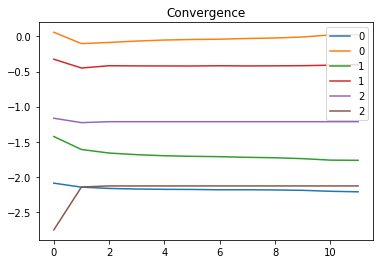

In [4]:
for i in range(cents.shape[1]):
    plt.plot(cents[:, i], label=i)
plt.legend()
plt.title("Convergence")
plt.title